## Kompresi

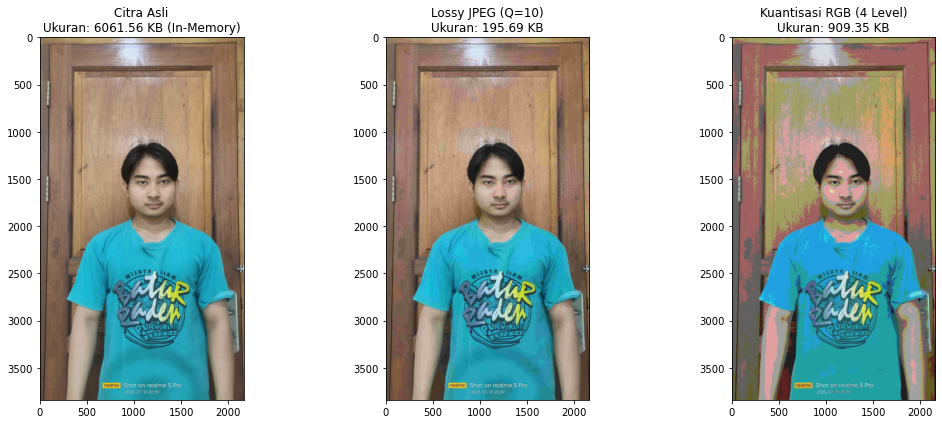

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import os
from PIL import Image

# Load citra asli
img_path = 'foto_revan_kompresi.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Kompresi lossy (JPEG kualitas 10%)
# ----------------------
is_success, buffer = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
img_compressed = cv2.imdecode(np.frombuffer(buffer, dtype=np.uint8), cv2.IMREAD_COLOR)
img_compressed_rgb = cv2.cvtColor(img_compressed, cv2.COLOR_BGR2RGB)
compressed_size = len(buffer) / 1024  # KB

# Kuantisasi warna (4 level per channel)
# ----------------------
img_quantized = np.floor_divide(img_rgb, 64) * 64 + 32
img_quantized = np.clip(img_quantized, 0, 255)
quantized_buffer = BytesIO()
Image.fromarray(img_quantized).save(quantized_buffer, format='PNG')
quantized_size = quantized_buffer.tell() / 1024  # KB

# ----------------------
# Ukuran asli
original_buffer = BytesIO()
Image.fromarray(img_rgb).save(original_buffer, format='PNG')
original_size = original_buffer.tell() / 1024  # KB
#202331016_Nanda Revan Saputro


# ----------------------
# Plot hasil
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.ravel()

axs[0].imshow(img_rgb)
axs[0].set_title(f'Citra Asli\nUkuran: {original_size:.2f} KB (In-Memory)')

axs[1].imshow(img_compressed_rgb)
axs[1].set_title(f'Lossy JPEG (Q=10)\nUkuran: {compressed_size:.2f} KB')

axs[2].imshow(img_quantized)
axs[2].set_title(f'Kuantisasi RGB (4 Level)\nUkuran: {quantized_size:.2f} KB')

plt.tight_layout()
plt.show()

# Simpan gambar hasil ke file
cv2.imwrite('compressed_q10.jpg', img_compressed)           # Gambar hasil kompresi lossy (BGR)
cv2.imwrite('quantized_rgb.png', cv2.cvtColor(img_quantized, cv2.COLOR_RGB2BGR))  # Hasil kuantisasi warna

# Juga simpan gambar asli jika perlu
cv2.imwrite('original_rgb.png', cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

#202331016_Nanda Revan Saputro